<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/Finetuning_model6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine tuning**

In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

Mounted at /content/drive
'107.1 syllabus 1SAY1920 FINAL.gdoc'
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
'1H-04 Narag et al.pdf'
 20220802_182749.heic
 20220802_182831.heic
 20220802_183259.heic
 20220803_125819.heic
 20220803_125842.heic
 20220803_144229.heic
 20220803_144422.heic
 20220803_160724.heic
 20220803_160751.heic
 20220803_165240.heic
 20220803_165318.heic
 20220803_174701.heic
 20220803_174706.heic
 20220804_175217.heic
 20220804_175443.heic
 20220804_175616.heic
 20220804_181917.heic
 20220804_182007.heic
 20220804_182117.heic
 2S22-23_LE3-Regular-Set-A-FINAL-KEY.pdf
'3 classes (polarized)CM_alexnet.png'
'3 classes (polarized)CM_vgg.png'
'A4_Physics 71 TWHFU-3_gradesheet (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades.gdoc'
'Abstract - NARAG, Mark Jeremy.pdf'
'Annex 1 (copy of Journal).pdf'
'Annex 2 (Proof of employments).pdf'
'App Physics 181 THY-FX-2_studentcontactlis

In [2]:
import os
from PIL import Image, ImageOps
import numpy as np
from sklearn.model_selection import train_test_split

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.3775):
        for i in np.arange(0,int(width/size)+1,0.3775):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data

def load_images_from_folder(folder_path, size, test_size):
    images = []
    filenames = sorted(os.listdir(folder_path))
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            im = ImageOps.grayscale(Image.open(img_path))
            images.extend(crop(im))
    # Split the images into training and validation sets
    X_train, X_val = train_test_split(images, test_size=test_size, random_state=42)
    return np.array(X_train), np.array(X_val)

input_folder_path = file_path+"7 Fine tuning/input"
output_folder_path = file_path+"7 Fine tuning/output"
size = 128
test_size = 0.2

# Load input and output images, split into training and validation sets
train_input, val_input = load_images_from_folder(input_folder_path, size, test_size)
train_output, val_output = load_images_from_folder(output_folder_path, size, test_size)

print("Training input size:", train_input.shape)
print("Validation input size:", val_input.shape)
print("Training output size:", train_output.shape)
print("Validation output size:", val_output.shape)


Training input size: (6873, 128, 128)
Validation input size: (1719, 128, 128)
Training output size: (6873, 128, 128)
Validation output size: (1719, 128, 128)


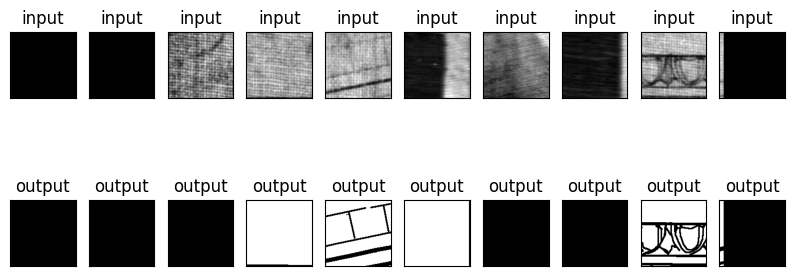

In [3]:
import matplotlib.pyplot as plt
N = 6000
n=10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+N]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+N]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [8]:
import time
start = time.time()
import tensorflow as tf
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import load_model
import tensorflow.keras as keras

model_number = 6
# Load your saved model
autoencoder = load_model(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

# Freeze layers to prevent retraining
for layer in autoencoder.layers:
    layer.trainable = True

# Compile the model with custom learning parameters
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Fine-tune the model
fine_tune_history = autoencoder.fit(train_input, train_output,
                                     epochs=2,
                                     shuffle=True,
                                     validation_data=(val_input, val_output))

# Save the fine-tuned model
autoencoder.save(file_path + '7 Fine tuning/' + 'autoencoder_fine_tuned_'+str(model_number))

# Save the fine-tune history
fine_tune_loss = fine_tune_history.history['loss']
fine_tune_loss_df = pd.DataFrame(fine_tune_loss)
fine_tune_loss_df.to_csv(file_path + '7 Fine tuning/' + 'fine_tune_loss_'+str(model_number)+'.csv')

fine_tune_val_loss = fine_tune_history.history['val_loss']
fine_tune_val_loss_df = pd.DataFrame(fine_tune_val_loss)
fine_tune_val_loss_df.to_csv(file_path + '7 Fine tuning/' +'fine_tune_val_loss_'+str(model_number)+'.csv')

# Record end time
end = time.time()

print("The time of execution of the fine-tuning program is:", (end - start), "seconds")

Epoch 1/2
215/215 [==============================] - 413s 2s/step - loss: 0.0293 - val_loss: 0.0267
Epoch 2/2
215/215 [==============================] - 413s 2s/step - loss: 0.0243 - val_loss: 0.0249
The time of execution of the fine-tuning program is: 867.3048627376556 seconds


In [5]:
autoencoder.save(file_path + '7 Fine tuning/' + 'autoencoder_fine_tuned_'+str(model_number)+'_b')